In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
import imageio

In [2]:
def densificaRotulosParaVetorDeResposta(gabaritoDeRespostaDoTreino, numeroDeCategorias):
    quantidadeDeRespostas = gabaritoDeRespostaDoTreino.shape[0]
    
    print(quantidadeDeRespostas)
    
    intervaloDoIndice = np.arange(quantidadeDeRespostas) * numeroDeCategorias
    
    respostaCategorica = np.zeros((quantidadeDeRespostas, numeroDeCategorias))
    
    respostaCategorica.flat[intervaloDoIndice + gabaritoDeRespostaDoTreino.ravel()] = 1
    return respostaCategorica

In [3]:
def exibeImagemDaMatriz(imagemRedimensionada):
    plt.imsave('pic.png', imagemRedimensionada)
    # read the image
    im = plt.imread('pic.png')
    # show the image
    plt.imshow(im)
    #save the image array to binary file
    np.save('mypic', im)
    plt.show()

In [4]:
def salvaImagemDaMatriz(imagemRedimensionada):
    numeroMagico = np.random.randint(0,999)
    nomeDoArquivo = "imagem"+str(numeroMagico)+".png"
    plt.imsave(nomeDoArquivo, imagemRedimensionada)
    #np.save(nomeDoArquivo, im)
    

In [5]:
def salvaImagemGif(nomeDaImagem, colecaoImagens):
    imageio.mimwrite(nomeDaImagem+".gif", colecaoImagens,'gif')

In [6]:
def salvaConjuntoImagemGif(nomeDaColecao, colecaoDeGifs):
    for indice in range(len(colecaoDeGifs)):
        nomeDoArquivo = nomeDaColecao + " - "+ str(indice)+".gif"
        salvaImagemGif(nomeDoArquivo,colecaoDeGifs[indice])

In [7]:
def abreImagemExemplo():
    imagem = imageio.imread('1.jpg','jpg')
    return imagem

In [8]:
dataTR = pd.read_csv('input/train.csv')
marcadorDoIndiceDeTreino = 0
imagens = dataTR.iloc[:,1:].values
imagens = imagens.astype(np.float)
gabaritoDeRespostaDoTreino = dataTR.iloc[:,0].values
numeroDeCategorias = 10
listaDeRespostaCategoricas = densificaRotulosParaVetorDeResposta(gabaritoDeRespostaDoTreino, numeroDeCategorias)

42000


In [9]:
numeroMagico = np.random.randint(0,750)
imagemRedimensionada = imagens[numeroMagico].reshape(28,28)
identificacaoDaImagem = gabaritoDeRespostaDoTreino[numeroMagico]


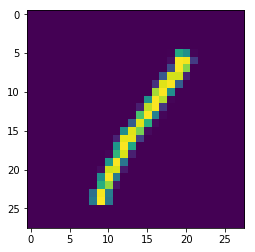

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [41]:
exibeImagemDaMatriz(imagemRedimensionada)
print(identificacaoDaImagem)
print (listaDeRespostaCategoricas[numeroMagico])

In [11]:
def geraFiltroAleatorioComTamanho(tamanhoDaJanela):
    filtro = np.random.rand(tamanhoDaJanela,tamanhoDaJanela)
    return filtro

In [12]:
def calculaProdutoEscalarMatrizesComTamanhoDaJanela( matriz1, matriz2, tamanhoDaJanela):
    valorEscalar = 0
    for i in range(matriz1.shape[0]):
        valorEscalar += np.dot(matriz1[i],matriz2[i])
    return valorEscalar

In [13]:
def relu(x):
    if x<0:
        return 0
    else:
        return x

In [14]:
def maxpollDaMatriz(matriz):
    return np.argmax(matriz)

In [15]:
def executaConvolucao (entradaDaConvolucao,tamanhoDaJanela):
    iteracaoColuna  = 0
    iteracaoLinha   = 0
    
    dimensaoXMatrizDeEntrada = int (entradaDaConvolucao.shape[0])
    dimensaoYMatrizDeEntrada = int (entradaDaConvolucao.shape[1])
    
    tamanhoXDaMatrizConvolucao = dimensaoXMatrizDeEntrada - tamanhoDaJanela
    tamanhoYDaMatrizConvolucao = dimensaoYMatrizDeEntrada - tamanhoDaJanela
    
    CamadaConvolucao    = np.zeros([tamanhoXDaMatrizConvolucao, tamanhoYDaMatrizConvolucao])
    
    filtro = geraFiltroAleatorioComTamanho(tamanhoDaJanela)
    
    for iteracaoLinha in range(tamanhoXDaMatrizConvolucao):
        for iteracaoColuna in range(tamanhoYDaMatrizConvolucao):
            
            fimDaColunaDaJanela = iteracaoColuna + tamanhoDaJanela
            fimDaLinhaDaJanela = iteracaoLinha + tamanhoDaJanela
            
            submatriz = entradaDaConvolucao [iteracaoLinha:fimDaLinhaDaJanela, iteracaoColuna: fimDaColunaDaJanela]
            
            valorPixelDaConvolucao = calculaProdutoEscalarMatrizesComTamanhoDaJanela(submatriz , filtro,tamanhoDaJanela)
            
            CamadaConvolucao [iteracaoLinha, iteracaoColuna] =  relu(valorPixelDaConvolucao)
    return CamadaConvolucao




In [16]:
def executaMaxpooling(matrizDeEntrada, tamanhoDaJanela, intervaloPorIteracao):
    dimensaoXMatrizDeEntrada = int (matrizDeEntrada.shape[0])
    dimensaoYMatrizDeEntrada = int (matrizDeEntrada.shape[1])
    tamanhoXDaMatrizMaxPolling = int(((matrizDeEntrada.shape[0] - tamanhoDaJanela) )/intervaloPorIteracao)+ 1
    tamanhoYDaMatrizMaxPolling = int(((matrizDeEntrada.shape[1] - tamanhoDaJanela) )/intervaloPorIteracao)+ 1

    matrizMaxPool = np.zeros([tamanhoXDaMatrizMaxPolling,tamanhoYDaMatrizMaxPolling])

    colunaMaxPool = 0
    linhaMaxPool  = 0
    for iteracaoLinha in range(0,dimensaoXMatrizDeEntrada-tamanhoDaJanela ,intervaloPorIteracao):
        colunaMaxPool = 0
        for iteracaoColuna in range(0, dimensaoYMatrizDeEntrada-tamanhoDaJanela , intervaloPorIteracao):
            submatriz = matrizDeEntrada[ iteracaoLinha: iteracaoLinha + tamanhoDaJanela, iteracaoColuna: iteracaoColuna + tamanhoDaJanela ]
            matrizMaxPool[ linhaMaxPool,colunaMaxPool ] = int(np.argmax(submatriz))
            colunaMaxPool += 1
        linhaMaxPool += 1
    return matrizMaxPool

In [17]:
def obtemcuboConvolucional(entrada,quantidadeDefiltros,tamanhoDaJanela):
    cuboConvolucional =  []
    if (len(np.shape(entrada)) > 2):
        for caracteristica in range(np.shape(entrada)[0]):
            cubo = obtemcuboConvolucional(entrada[caracteristica],quantidadeDeFiltros,tamanhoDaJanela)
            cuboConvolucional.append(cubo)
    else:
        for i in range(quantidadeDefiltros):
            cuboConvolucional.append(executaConvolucao(entrada,tamanhoDaJanela))
    return cuboConvolucional

In [18]:
def obtemCuboMaxPooling(cuboConvolucional,tamanhoDaJanela,intervaloPorIteracao):
    cuboMaxPooling = []
    if (len(np.shape(cuboConvolucional))>3):
        for subTensor in cuboConvolucional:
            submatrizRecursiva = obtemCuboMaxPooling(subTensor,tamanhoDaJanela,intervaloPorIteracao)
            cuboMaxPooling.append(submatrizRecursiva)
    else:
        for i in range(np.shape(cuboConvolucional)[0]):
            cuboMaxPooling.append(executaMaxpooling(cuboConvolucional[i], tamanhoDaJanela, intervaloPorIteracao))
    return cuboMaxPooling

In [19]:
#imagemDeExemplo = abreImagemExemplo()
imagemDeExemplo = imagemRedimensionada
imagemDeExemploArray = np.asarray(imagemRedimensionada)

In [20]:
def exibeCanalVermelho(imagem):
    plt.title('Canal Vermelho')
    plt.ylabel('Altura {}'.format(imagem.shape[0]))
    plt.xlabel('Comprimento {}'.format(imagem.shape[1]))
    if (len(imagem.shape)>3):
        plt.imshow(imagem[ : , : , 0])
        print(imagem[ : , : , 0].shape)
        salvaImagemDaMatriz(imagem[ : , : , 0])
    if (len(imagem.shape) == 2):
        plt.imshow(imagem)
        plt.show()

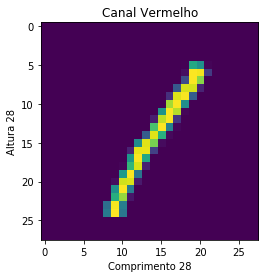

In [21]:
exibeCanalVermelho(imagemDeExemplo)

In [22]:
#plt.title('Canal Verde')
#plt.ylabel('Altura {}'.format(imagemDeExemplo.shape[0]))
#plt.xlabel('Comprimento {}'.format(imagemDeExemplo.shape[1]))

#plt.imshow(imagemDeExemplo[ : , : , 1])
#salvaImagemDaMatriz(imagemDeExemplo[ : , : , 1])
#plt.show()

In [23]:
#plt.title('Canal Azul')
#plt.ylabel('Altura {}'.format(imagemDeExemplo.shape[0]))
#plt.xlabel('Comprimento {}'.format(imagemDeExemplo.shape[1]))

#plt.imshow(imagemDeExemplo[ : , : , 2])
#salvaImagemDaMatriz(imagemDeExemplo[ : , : , 2])
#plt.show()

In [24]:
quantidadeDeFiltros = 9
tamanhoDoFiltro = 4

In [25]:
#imagemDeExemploVermelho= imagemDeExemplo[ : , : , 0]
#imagemDeExemploVerde= imagemDeExemplo[ : , : , 1]
#imagemDeExemploAzul= imagemDeExemplo[ : , : , 2]

In [26]:
cuboConvolucionalVermelho = obtemcuboConvolucional(imagemDeExemplo,quantidadeDeFiltros,tamanhoDoFiltro)
cuboConvolucionalVermelhoMatriz = np.asarray(cuboConvolucionalVermelho)
salvaImagemGif('cuboConvolucional',cuboConvolucionalVermelho)

In [27]:
#cuboConvolucionalAzul = obtemcuboConvolucional(imagemDeExemploAzul,quantidadeDeFiltros,tamanhoDoFiltro)
#cuboConvolucionalAzulMatriz = np.asarray(cuboConvolucionalAzul)
#salvaImagemGif('cuboConvolucionalMatrizAzul.gif',cuboConvolucionalAzul)

In [28]:
#cuboConvolucionalVerde = obtemcuboConvolucional(imagemDeExemploVerde,quantidadeDeFiltros,tamanhoDoFiltro)
#cuboConvolucionalVerdeMatriz = np.asarray(cuboConvolucionalVerde)
#salvaImagemGif('cuboConvolucionalMatrizVerde.gif',cuboConvolucionalVerde)

In [29]:
#cuboConvolucionalColorido = []
#for i in range (quantidadeDeFiltros):
#    cuboConvolucionalColorido[i].append(cuboConvolucionalVermelho[i])
#    cuboConvolucionalColorido[i].append(cuboConvolucionalVerde[i])
#    cuboConvolucionalColorido[i].append(cuboConvolucionalAzul[i])

#cuboConvolucionalColoridoMatriz = np.asarray(cuboConvolucionalColorido)
#salvaImagemGif('cuboConvolucionalMatrizColorido.gif',cuboConvolucionalColoridoMatriz)

In [30]:
tamanhoDaJanela = 2
passosPorIteracao = 2
CuboMaxPooling = obtemCuboMaxPooling (cuboConvolucionalVermelhoMatriz, tamanhoDaJanela, passosPorIteracao)
CuboMaxPoolingMatriz = np.asarray(CuboMaxPooling)


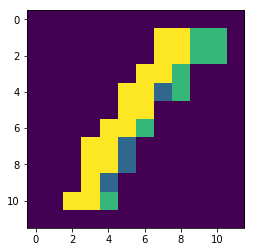

(12, 12)


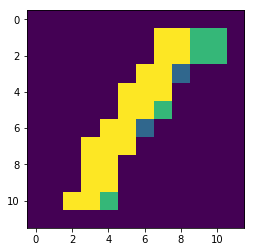

(12, 12)


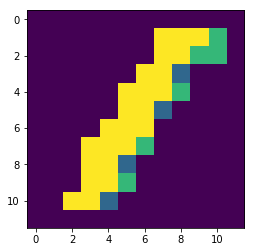

(12, 12)


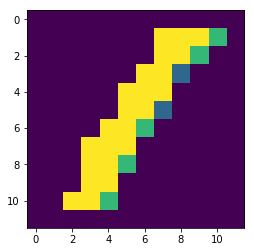

(12, 12)


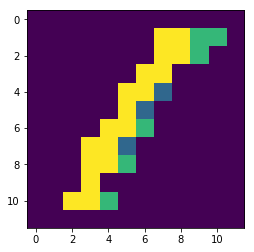

(12, 12)


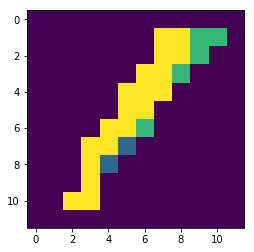

(12, 12)


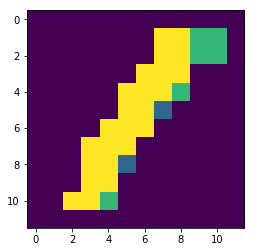

(12, 12)


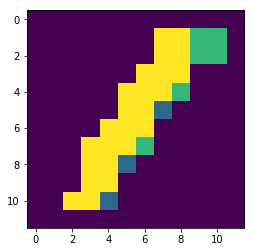

(12, 12)


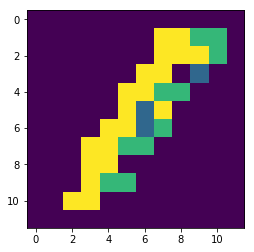

(12, 12)


In [31]:
for imagem in CuboMaxPooling:
    exibeImagemDaMatriz(imagem)
    print(np.shape(imagem))

In [32]:
#nao rodar ainda pois esta sendo testado a celula anterior (muito processamento)
#segundoCuboConvolucional = obtemcuboConvolucional(CuboMaxPoolingMatriz,20,4)
#segundoCuboConvolucionalMatriz = np.asarray(segundoCuboConvolucional)
#salvaConjuntoImagemGif(str(identificacaoDaImagem),segundoCuboConvolucionalMatriz)

In [33]:
quantidadeDeFiltros2 = 9
tamanhoDaJanela2 = 4
segundaConvolucao = obtemcuboConvolucional(CuboMaxPooling, quantidadeDeFiltros2, tamanhoDaJanela2)
print(np.shape(CuboMaxPooling))

(9, 12, 12)


In [34]:

tamanhoDaJanela = 2
passosPorIteracao = 1
segundoMaxPooling = []
#for cuboDaConvolucao in segundaConvolucao:
#    segundoMaxPooling.append(obtemCuboMaxPooling(cuboDaConvolucao,tamanhoDaJanela, passosPorIteracao))
segundoMaxPooling = obtemCuboMaxPooling(segundaConvolucao,tamanhoDaJanela,passosPorIteracao)

In [35]:
print(np.shape(segundoMaxPooling))

(9, 9, 7, 7)


In [36]:
quantidadeDeFiltros3 = 9
tamanhoDaJanela3 = 2
terceiraCamadaConvolucional = []
for cuboDoSegundoMaxPool in segundoMaxPooling:
    terceiraCamadaConvolucional.append( obtemcuboConvolucional(cuboDoSegundoMaxPool,quantidadeDeFiltros3,tamanhoDaJanela3))

In [37]:
terceiroTensorMaxPooling = []
tamanhoDaJanela = 2
passosPorIteracao = 1
terceiroTensorMaxPooling = obtemCuboMaxPooling(terceiraCamadaConvolucional, tamanhoDaJanela, passosPorIteracao)
np.shape(terceiroTensorMaxPooling)

(9, 9, 9, 4, 4)

In [38]:
dimensaoDoVetor = 1
for dimensaoDoTensor in np.shape(terceiroTensorMaxPooling):
    dimensaoDoVetor *= dimensaoDoTensor
    

vetorSaidaCapturaDeCaracteristica = np.asarray(terceiroTensorMaxPooling).reshape(int(np.sqrt(dimensaoDoVetor)),int(np.sqrt(dimensaoDoVetor)))
salvaImagemDaMatriz(vetorSaidaCapturaDeCaracteristica)

In [39]:
taxaDeAprendizado = 0.01

In [40]:
def classifica(vetorDeEntrada):
    